### only use the abs version AR

#### see final script at :

/pic/projects/hyperion/chen423/tools/paper_tools/AR-SST/step5.moisture_decomposition.py

In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
scenario = 'HIST'

year = 2003
month = 10

para_b = int(10)

In [3]:
reffile = '/raid1/chen423/serdp/data/ref_data/wrf_ref/geo_em.d01.nc'
landmask = xr.open_dataset(reffile).LANDMASK.values[0,para_b:(450-para_b),para_b:(450-para_b)]

In [4]:
ETdir = '/home/chen423/.tmp/AR-SST/%s/moisture/ET/' % (scenario)
uIVTdir = '/home/chen423/.tmp/AR-SST/%s/moisture/uIVT/' % (scenario)
vIVTdir = '/home/chen423/.tmp/AR-SST/%s/moisture/vIVT/' % (scenario)
#ARdir = '/home/chen423/.tmp/AR-SST/%s/AR_tagged/Gershunov/SERDP6km_adj/' % (scenario)

In [5]:
ETfile = ETdir + 'WRF_NARR.%s.SFCEVP.%d.%d.nc' % (scenario, year, month)
uIVTfile = uIVTdir + 'WRF_NARR.%s.uIVT.%d.%d.nc' % (scenario, year, month)
vIVTfile = vIVTdir + 'WRF_NARR.%s.vIVT.%d.%d.nc' % (scenario, year, month)

#ARfile = ARdir + 'WRF_ARtag_adj.%s.Gershunov.%d.%d.ARabs.nc' % (scenario, year, month)

In [6]:
ETdata = xr.open_dataset(ETfile).SFCEVP.values[:,para_b:(450-para_b),para_b:(450-para_b)]
uIVTdata = xr.open_dataset(uIVTfile).uIVT.values[:,para_b:(450-para_b),para_b:(450-para_b)]
vIVTdata = xr.open_dataset(vIVTfile).vIVT.values[:,para_b:(450-para_b),para_b:(450-para_b)]
#ARtag = xr.open_dataset(ARfile).AR_tag.values[:,para_b:(450-para_b),para_b:(450-para_b)]

In [26]:
def compute_moisture_intensity(in_uIVT, in_vIVT, in_ET, ref_mask):
    # refmask is landmak, land is 1, ocean is 0
    
    # note:
    #      uIVT: into the domain
    #      vIVT: bottom: into the domain;   top: away from the domain
    
    #uIVT_total = in_uIVT[:,0][in_ARtag[:,0]==1].sum()*6000*86400
    uIVT_total = in_uIVT[:,0].sum()*6000*86400
    vIVT_sub_bottom = in_vIVT[0,:][ref_mask[0,:]==0].sum()*6000*86400
    vIVT_sub_top = in_vIVT[(450-2*para_b-1),:][ref_mask[(450-2*para_b-1),:]==0].sum()*6000*86400
    ET_total = in_ET[(ref_mask==0)].sum()*6000*6000

    return ET_total, uIVT_total, vIVT_sub_bottom, vIVT_sub_top

In [27]:
nt = uIVTdata.shape[0]
testdata = np.zeros((nt,4))
for t in np.arange(nt):
    testdata[t] = compute_moisture_intensity(uIVTdata[t], vIVTdata[t], ETdata[int(np.floor(t/4))], landmask)
    print(t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


(-0.2, 0.3)

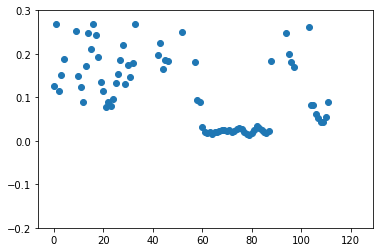

In [32]:
plt.scatter(np.arange(nt), testdata[:,0]/(testdata[:,1]+testdata[:,2]-testdata[:,3]))
plt.ylim([-0.2, 0.3])

In [35]:
import scipy.io as sio

In [36]:
testfile = '/home/chen423/.tmp/AR-SST/HIST/moisture/full_ocean/ETratio.HIST.full_ocean.2003.10.mat'
array_ET = sio.loadmat(testfile)['array_ET']
array_uIVT = sio.loadmat(testfile)['array_uIVT']
array_vIVT_bottom = sio.loadmat(testfile)['array_vIVT_bottom']
array_vIVT_top = sio.loadmat(testfile)['array_vIVT_top']

(-0.2, 0.3)

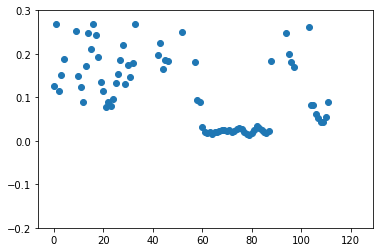

In [38]:
plt.scatter(np.arange(nt), array_ET/(array_uIVT+array_vIVT_bottom-array_vIVT_top))
plt.ylim([-0.2, 0.3])